# HW2 | Problem 2
#### Cormac Taylor
#### I pledge my honor that I have abided by the Stevens Honor System.

# Imports

In [165]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pandas

# Libraries
- NumPy
- Pandas
- Matplotlib
- PIL

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from PIL import Image
import glob

# 2.1 |  Principal Component Analysis

## Importing data and displaying first

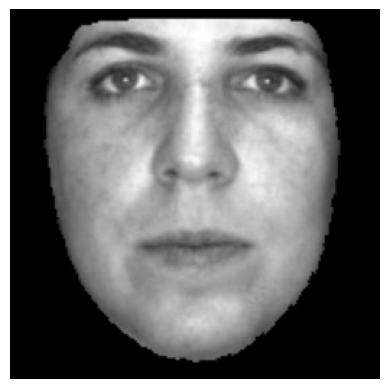

In [167]:
image_paths = glob.glob("./face_data/face*.bmp")
images = [Image.open(img_path) for img_path in image_paths]

mpl.imshow(images[0], cmap='gray')
mpl.axis('off')
mpl.show()

## Flattening data and creating data matrix

In [168]:
data_matrix_matrix = np.array(images)
data_vector_matrix = [matrix.flatten() for matrix in data_matrix_matrix]

face_data = np.array(data_vector_matrix)
face_data[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Split train/test

In [169]:
X_train, X_test = train_test_split(face_data, test_size=0.11, random_state=42)

## Calculate mean image and center images

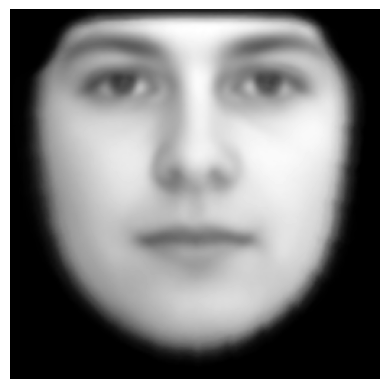

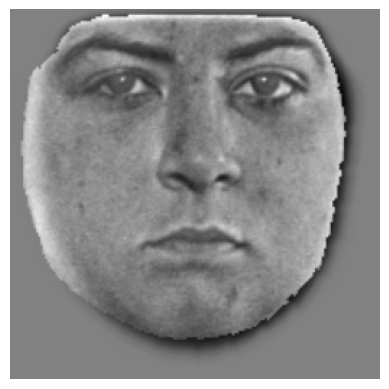

In [170]:
mean_X_train = np.mean(X_train, axis=0)

mpl.imshow(mean_X_train.reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()

centered_X_train = np.array([(x - mean_X_train) for x in X_train])

mpl.imshow(centered_X_train[1].reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()


## CPA Code

In [171]:
class PCA:    
    def get_second(tuple):
        return tuple[1]
    
    def get_K_eigenvectors(self, K, X):
        cov = np.cov(centered_X_train)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        eigen_pairs = np.column_stack((eigenvalues, eigenvectors))
        sorted_pairs = np.argsort(eigen_pairs[:, 0])[::-1]
        eigen_pairs[sorted_pairs]
        
        K_eigen_pairs = eigen_pairs[:K]
        return K_eigen_pairs[:, 1:]
    
    def rescale_eigenvectors(self, X, eigenvectors):
        return np.array([(np.dot(X.T, vect) / np.linalg.norm(np.dot(X.T, vect))) for vect in eigenvectors])




## Applying CPA

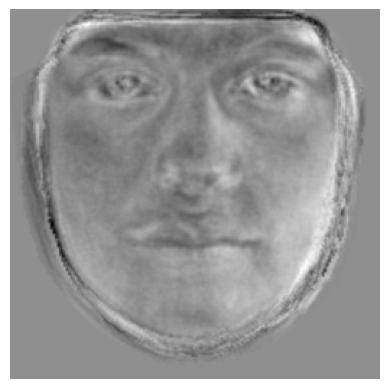

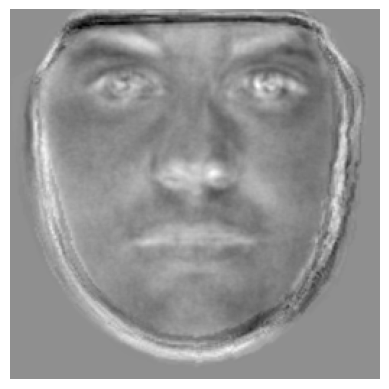

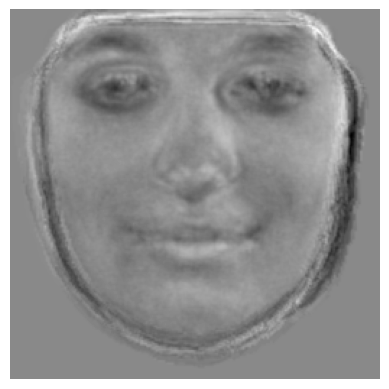

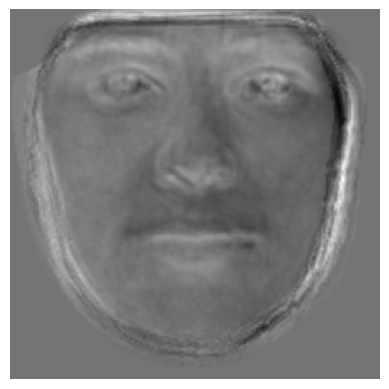

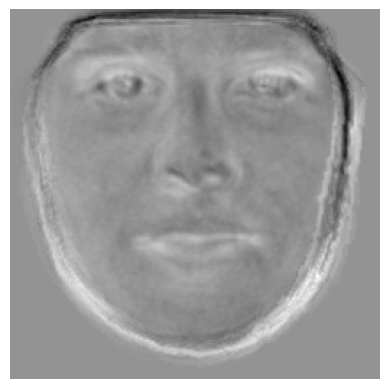

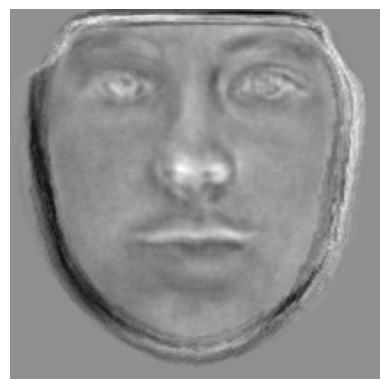

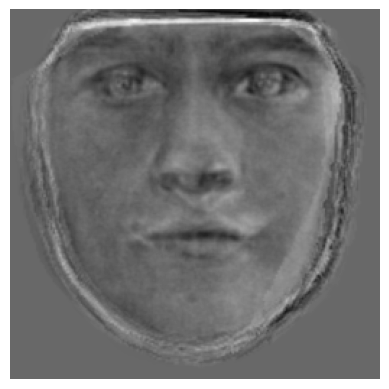

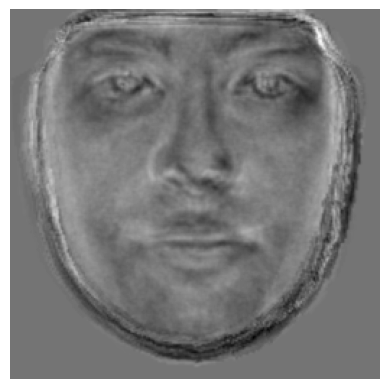

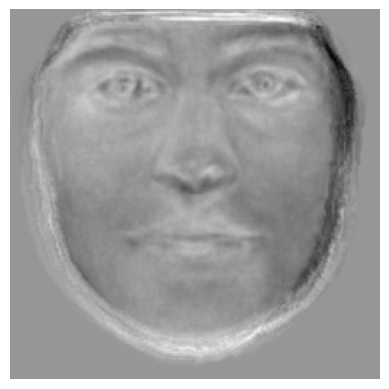

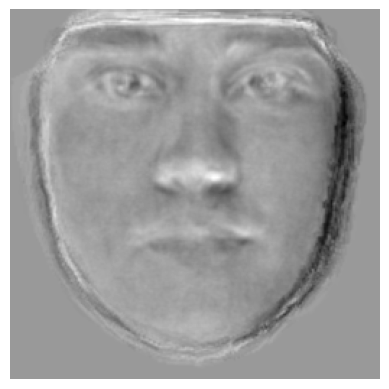

In [172]:
pca = PCA()
K = 30

top_thirty_eigenvectors = pca.get_K_eigenvectors(K, centered_X_train)
eigenvectors = pca.rescale_eigenvectors(centered_X_train, top_thirty_eigenvectors)

for i in range(10):
    eigenface = eigenvectors[i].reshape(256,256)
    mpl.imshow(eigenface, cmap='gray')
    mpl.axis('off')
    mpl.show()


# 2.2 Reconstruction

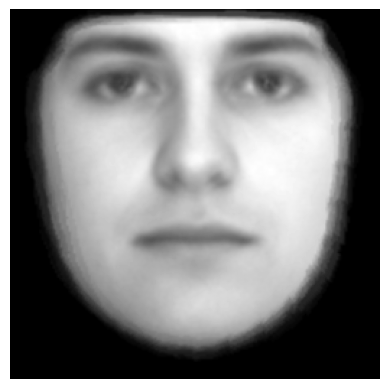

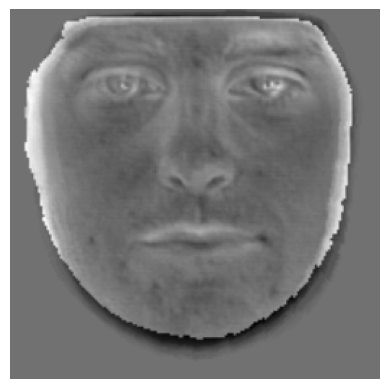

In [173]:
mean_X_test = np.mean(X_test, axis=0)

mpl.imshow(mean_X_test.reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()

centered_X_test = np.array([(x - mean_X_test) for x in X_test])

mpl.imshow(centered_X_test[1].reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()


# 2.3 |  Eigenface
